## Projeto Completo - Regressão - Olist

In [1]:
## importando as bibliotecas

import pandas as pd
import numpy as np

from summarytools import dfSummary
import missingno ## biblioteca interessante para se verificar nulos - ausentes
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  ## mostrar todas as colunas do dataset

In [2]:
## carregando datasets
orders = pd.read_csv('olist_orders_dataset.csv')
itens = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

## clientes
customers = pd.read_csv('olist_customers_dataset.csv')

## reviews
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

## pagamentos
payments = pd.read_csv('olist_order_payments_dataset.csv')

## vendedores
sellers = pd.read_csv('olist_sellers_dataset.csv')

## geolocalização
geolocation = pd.read_csv('olist_geolocation_dataset.csv')

## 01 - Explorando os Datasets

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [10]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### 02 - Merge dos Datasets

In [11]:
df1 = pd.merge(orders, itens, on='order_id')

df2 = pd.merge(df1, products, on='product_id')

df3 = pd.merge(df2, customers, on='customer_id')

df4 = pd.merge(df3, reviews, on='order_id')

df5 = pd.merge(df4, payments, on='order_id')

df = pd.merge(df5, sellers, on='seller_id')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP


In [12]:
print(f'A Base possui {df.shape[0]} linhas e {df.shape[1]} colunas')

A Base possui 117329 linhas e 39 colunas


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [14]:
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,117329.000000,117329.000000,117329.000000,115634.000000,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000,117329.000000
mean,1.194121,120.524349,20.027514,48.768018,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,35060.118112,4.031467,1.094452,2.940151,172.062565,24450.781955
std,0.684225,182.944843,15.828077,10.033831,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,29849.496175,1.387927,0.731174,2.775370,265.388194,27582.364358
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11250.000000,4.000000,1.000000,1.000000,60.750000,6429.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24240.000000,5.000000,1.000000,2.000000,108.100000,13660.000000
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58770.000000,5.000000,1.000000,4.000000,189.060000,28035.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,99730.000000


In [15]:
## verificando quantidades de nulos

df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1695
product_name_lenght                1695
product_description_lenght         1695
product_photos_qty                 1695
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0


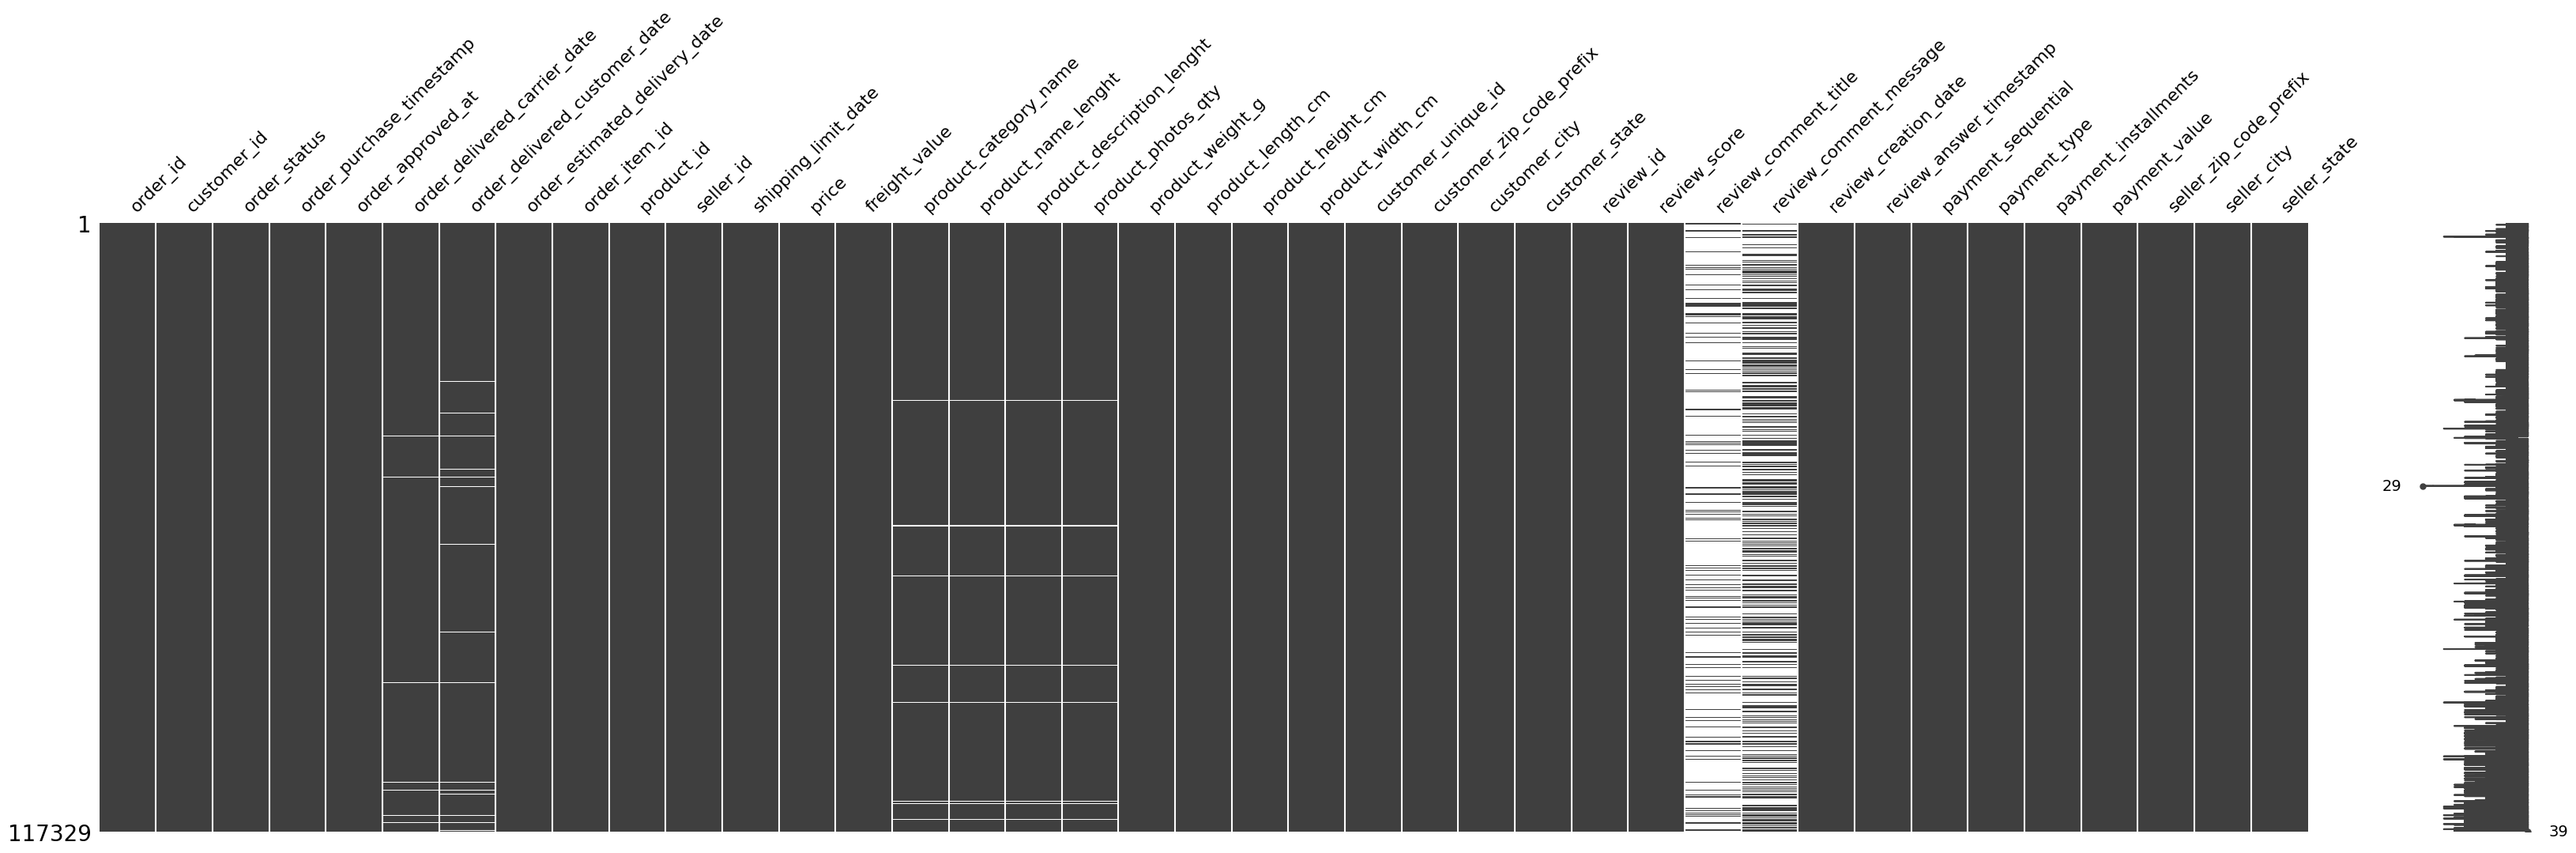

In [16]:
missingno.matrix(df, figsize=(40,10));

In [17]:
## verificando os nulos de forma percentual

rows, columns = df.shape

percentual_nan = ((df.isnull().sum()/rows)*100).round(2)
percentual_nan

order_id                          0.00
customer_id                       0.00
order_status                      0.00
order_purchase_timestamp          0.00
order_approved_at                 0.01
order_delivered_carrier_date      1.05
order_delivered_customer_date     2.11
order_estimated_delivery_date     0.00
order_item_id                     0.00
product_id                        0.00
seller_id                         0.00
shipping_limit_date               0.00
price                             0.00
freight_value                     0.00
product_category_name             1.44
product_name_lenght               1.44
product_description_lenght        1.44
product_photos_qty                1.44
product_weight_g                  0.02
product_length_cm                 0.02
product_height_cm                 0.02
product_width_cm                  0.02
customer_unique_id                0.00
customer_zip_code_prefix          0.00
customer_city                     0.00
customer_state           

In [18]:
contagem = pd.DataFrame(columns=['Variavel', 'Quantidade_valores_distintos'])

for colunas in df.columns:
    dados = pd.DataFrame({'Variavel': [colunas], 'Quantidade_valores_distintos': df[colunas].value_counts().shape[0]})
    contagem = pd.concat([contagem, dados], ignore_index=True)

contagem

,Variavel,Quantidade_valores_distintos
0,order_id,97916
1,customer_id,97916
2,order_status,7
3,order_purchase_timestamp,97370
4,order_approved_at,89533
5,order_delivered_carrier_date,80449
6,order_delivered_customer_date,95021
7,order_estimated_delivery_date,449
8,order_item_id,21
9,product_id,32789


In [19]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,order_id[object],1. 895ab968e7bb0d5659d16cd74cd1652. fedcd9f7ccdc8cba3a18defedd1a553. fa65dad1b0e818e3ccc5cb0e3923134. ccf804e764ed5650cd8759557269dc5. c6492b842ac190db807c15aff21a7d6. 68986e4324f6a21481df4e6e89abcf7. a3725dfe487d359b5be08cac48b64e8. 465c2e1bee4561cb39e0db8c5993aa9. 6d58638e32674bebee793a47ac4cba10. 5a3b1c29a49756e75f1ef513383c0c11. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,customer_id[object],1. 270c23a11d024a44c896d1894b261a2. 13aa59158da63ba0e93ec6ac2c07aa3. 9af2372a1e49340278e7c1ef8d749f4. 92cd3ec6e2d643d4ebd0e3d6238f695. 6ee2f17e3b6c33d6a9557f280edd296. 86cc80fef09f7f39df4b0dbce48e817. d22f25a9fadfb1abbc2e29395b12398. 63b964e79dee32a3587651701a2b8d9. 2ba91e12e5e4c9f56b82b86d9031d310. be1c4e52bb71e0c54b11a26b8e8d5911. other,"63 (0.1%)38 (0.0%)29 (0.0%)26 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)24 (0.0%)22 (0.0%)117,031 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,order_status[object],1. delivered2. shipped3. canceled4. invoiced5. processing6. unavailable7. approved,"114,859 (97.9%)1,167 (1.0%)553 (0.5%)370 (0.3%)370 (0.3%)7 (0.0%)3 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9t

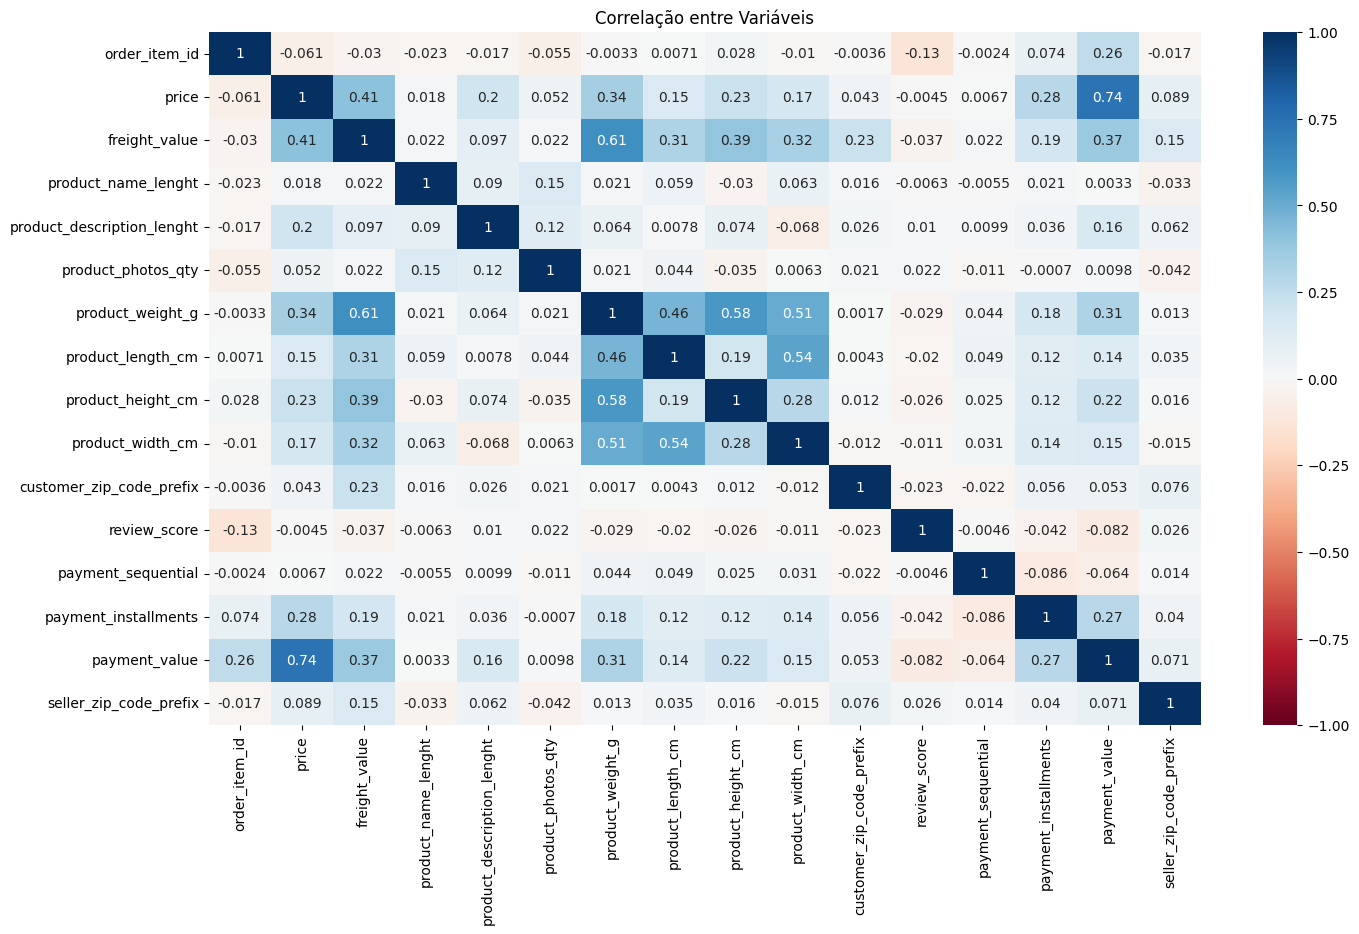

In [20]:
##verificando graficamente

plt.figure(figsize=(16,9))
plt.title('Correlação entre Variáveis')

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap='RdBu')  ## deixar os valores dentro das celulas coloridas
plt.show()

### Lembrar que Correlação não implica em Causalidade

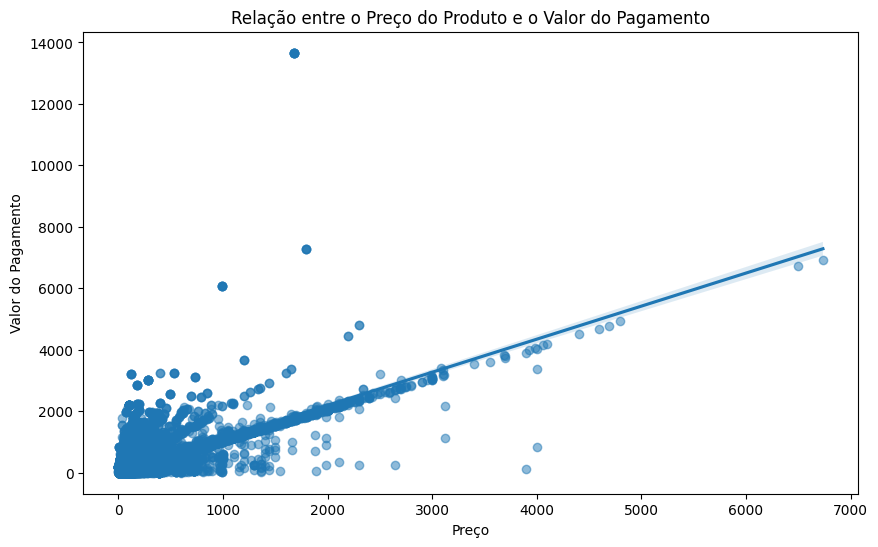

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='payment_value', data=df, scatter_kws={'alpha':0.5})

plt.title('Relação entre o Preço do Produto e o Valor do Pagamento')
plt.xlabel('Preço')
plt.ylabel('Valor do Pagamento')
plt.show()

(array([0]), [Text(0, 0, '')])

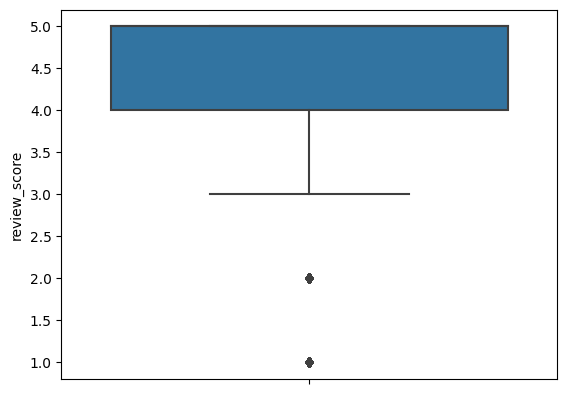

In [22]:
## checando reviews por boxplot

fig = sns.boxplot(y='review_score', data=df)
plt.xticks(rotation=90)

In [23]:
df['review_score'].describe()

count    117329.000000
mean          4.031467
std           1.387927
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

#### Fazendo um Countplot

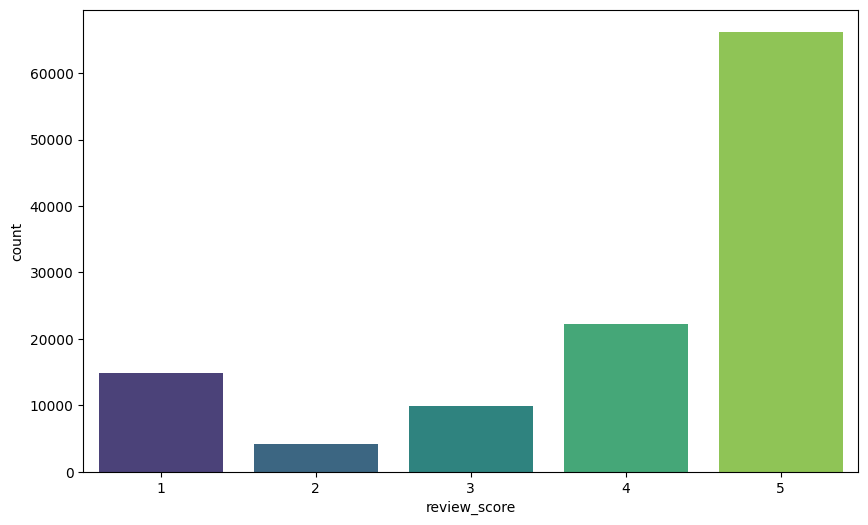

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='review_score', palette='viridis')
plt.show()

In [25]:
## olhando o price

df['price'].describe()

count    117329.000000
mean        120.524349
std         182.944843
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

(array([0]), [Text(0, 0, '')])

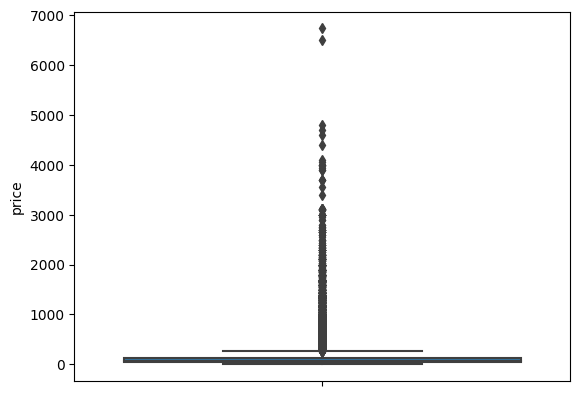

In [26]:
## checando price por boxplot

fig = sns.boxplot(y='price', data=df)
plt.xticks(rotation=90)

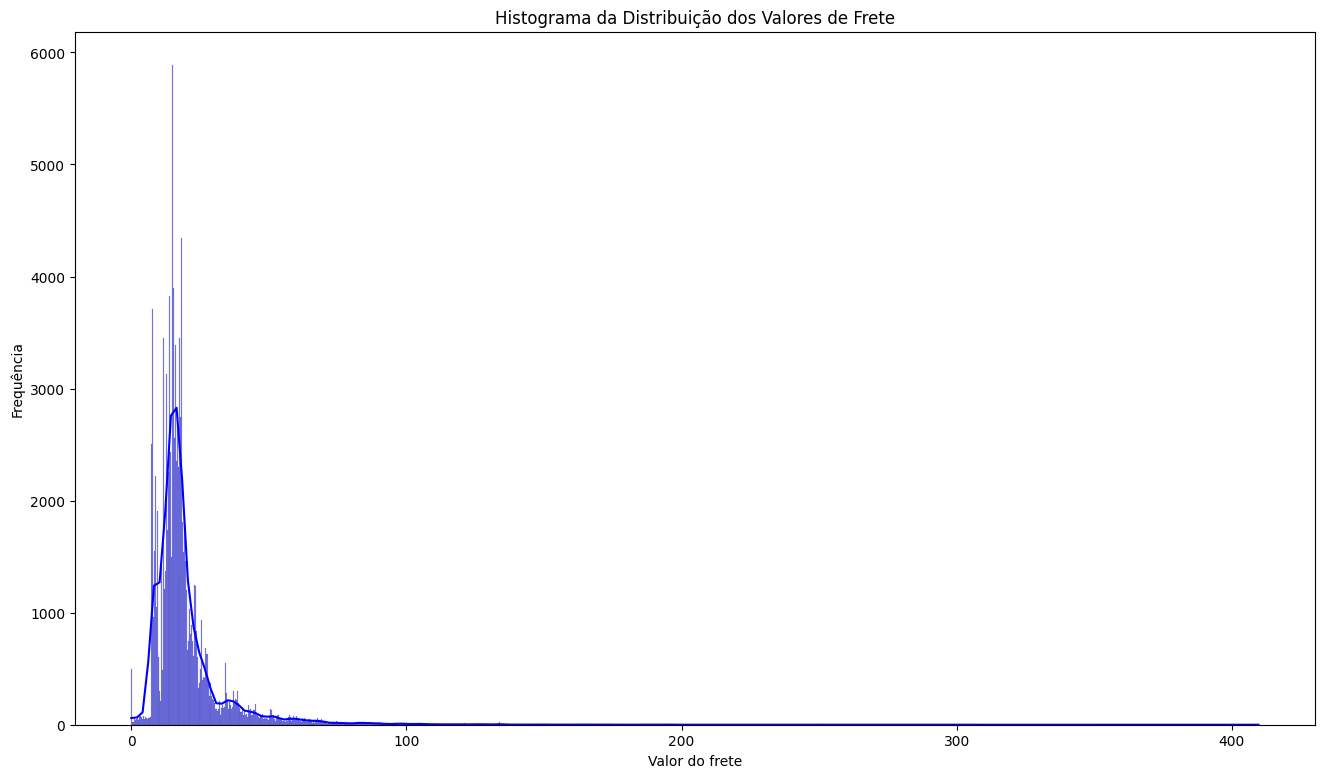

In [27]:
## checando frete

plt.figure(figsize=(16,9))
sns.histplot(x='freight_value', data=df, color='blue', kde=True)
plt.title('Histograma da Distribuição dos Valores de Frete')
plt.xlabel('Valor do frete')
plt.ylabel('Frequência')
plt.show()

In [28]:
df['freight_value'].describe()

count    117329.000000
mean         20.027514
std          15.828077
min           0.000000
25%          13.080000
50%          16.280000
75%          21.180000
max         409.680000
Name: freight_value, dtype: float64

#### Criando Novas Variáveis

In [29]:
## criando variável volume

df['volume'] = df['product_length_cm']*df['product_height_cm']*df['product_width_cm']

In [30]:
## criando variável densidade

df['densidade'] = df['product_weight_g']/df['volume']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [32]:
## criando coluna - velocidade de entrega

## Alterando formato dos dados de data para fomarto "data"

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

## criando coluna com velocidade real de entrega

df['velocidade_entrega_real'] = (df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days  ## entrega - compra - verificado por dias
df['velocidade_entrega_estimada'] = (df['order_estimated_delivery_date']-df['order_purchase_timestamp']).dt.days 

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,1976.0,0.253036,2.0,12
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,1976.0,0.253036,5.0,12


In [33]:
## criação da velocidade de aprovação do pedido

df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

df['velocidade_processamento'] = (df['order_approved_at']-df['order_purchase_timestamp']).dt.days

#### Mexendo no Dataset de Geolocation

In [34]:
geolocation_agregado = geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean', 'geolocation_lng':'mean'}).reset_index()

geolocation_agregado.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [35]:
## trazendo latitudade e longitude dos vendedores

df = pd.merge(df, geolocation_agregado, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,9350,-23.680729,-46.444238
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,1976.0,0.253036,2.0,12,0.0,9350,-23.680729,-46.444238
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,1976.0,0.253036,5.0,12,0.0,9350,-23.680729,-46.444238


In [36]:
df.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)

df.drop(columns='geolocation_zip_code_prefix', inplace=True)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,1,credit_card,3,37.77,9350,maua,SP,1976.0,0.253036,2.0,12,0.0,-23.680729,-46.444238
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,1,credit_card,1,37.77,9350,maua,SP,1976.0,0.253036,5.0,12,0.0,-23.680729,-46.444238


In [37]:
## trazendo latitudade e longitude dos compradores

df = pd.merge(df, geolocation_agregado, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,seller_lat,seller_lng,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,3149,-23.576983,-46.587161
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,3149,-23.576983,-46.587161


In [38]:
df.rename(columns={'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'}, inplace=True)

df.drop(columns='geolocation_zip_code_prefix', inplace=True)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,seller_lat,seller_lng,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,-23.680729,-46.444238,-23.576983,-46.587161
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,-23.576983,-46.587161
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,-22.708702,-47.664701,-23.576983,-46.587161


### Calculando as Distâncias entre Compradores e Vendedores

In [39]:
from geopy.distance import geodesic

In [40]:
## calculando distância

def calcular_distancia(dataframe):
    seller_coordenadas = (dataframe['seller_lat'], dataframe['seller_lng'])
    customer_coordenadas = (dataframe['customer_lat'], dataframe['customer_lng'])

    return geodesic(seller_coordenadas, customer_coordenadas).kilometers

df['distancia'] = df.apply(calcular_distancia, axis=1)

In [41]:
df['distancia'].value_counts()

distancia
381.211418     42
292.919289     38
965.573215     29
219.529210     27
311.585873     26
               ..
413.204399      1
512.575322      1
486.501321      1
931.795585      1
1754.596735     1
Name: count, Length: 92686, dtype: int64

In [42]:
## após cálculo das distancias podemos excluir colunas

df.drop(columns=['seller_lat', 'seller_lng', 'customer_lat', 'customer_lng'], inplace=True)

#### Obtendo Mês e Dia da Compra

In [43]:
df['mes_compra'] = df['order_purchase_timestamp'].dt.month

## dia da semana

df['dia_semana_compra'] = df['order_purchase_timestamp'].dt.dayofweek

#### Época do Ano

In [44]:
## trazendo informações de época do ano

df['black_friday'] = ((df['mes_compra'] == 11) & (df['dia_semana_compra'] == 4) & (df['order_purchase_timestamp'].dt.day >=20) & (df['order_purchase_timestamp'].dt.day <=30)).astype(int)
df['natal'] = ((df['mes_compra'] == 12) & (df['order_purchase_timestamp'].dt.day >=1) & (df['order_purchase_timestamp'].dt.day <=25)).astype(int)

In [45]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,9350,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,1,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04,2,6cc44821f36f3156c782da72dd634e47,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-28 18:05:36,99.90,11.79,cama_mesa_banho,55.0,273.0,1.0,1050.0,38.0,10.0,38.0,8a4002923e801e3120a11070fd31c9e2,3149,sao paulo,SP,3cd186b6013f4145b9bd406847b61f19,5,NaN,Nâo sabia da entrega aos domingos pelo correio...,2018-03-26 00:00:00,2018-03-27 02:21:27,1,credit_card,2,223.38,13405,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0


In [46]:
## removendo colunas

colunas_para_remover = ['order_id', 'customer_id', 'product_id', 'seller_id', 'order_status', 'order_purchase_timestamp', 
                       'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                       'order_estimated_delivery_date', 'shipping_limit_date', 'product_description_lenght', 'product_name_lenght',
                       'product_photos_qty', 'customer_unique_id', 'review_id', 'review_comment_title', 'review_comment_message',
                       'review_creation_date', 'review_answer_timestamp', 'payment_sequential', 'payment_type', 'payment_installments',
                       'payment_value', 'seller_zip_code_prefix', 'order_item_id']

df.drop(columns=colunas_para_remover, inplace=True)

df.head()

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,customer_city,customer_state,review_score,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
0,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
1,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,3149,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
3,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,3149,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
4,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,3149,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0


In [47]:
df.drop(columns=['customer_zip_code_prefix'], inplace=True)

In [48]:
df[df.duplicated]

,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_city,customer_state,review_score,seller_city,seller_state,volume,densidade,velocidade_entrega_real,velocidade_entrega_estimada,velocidade_processamento,distancia,mes_compra,dia_semana_compra,black_friday,natal
1,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
2,29.99,8.72,utilidades_domesticas,500.0,19.0,8.0,13.0,sao paulo,SP,4,maua,SP,1976.0,0.253036,8.0,15,0.0,18.566632,10,0,0,0
4,99.90,11.79,cama_mesa_banho,1050.0,38.0,10.0,38.0,sao paulo,SP,5,piracicaba,SP,14440.0,0.072715,2.0,12,0.0,146.370789,3,3,0,0
15,34.90,20.84,utilidades_domesticas,3700.0,32.0,22.0,46.0,florianopolis,SC,5,limeira,SP,32384.0,0.114254,8.0,27,0.0,556.788540,10,2,0,0
76,102.90,9.64,tablets_impressao_imagem,450.0,25.0,5.0,20.0,campinas,SP,5,santos,SP,2500.0,0.180000,8.0,10,0.0,136.727155,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116727,159.90,12.14,bebes,2200.0,16.0,35.0,49.0,itapecerica da serra,SP,5,maua,SP,27440.0,0.080175,4.0,9,0.0,41.916880,8,4,0,0
116740,960.00,82.51,moveis_escritorio,50.0,35.0,90.0,45.0,biguacu,SC,1,lajeado,RS,141750.0,0.000353,NaN,28,0.0,389.570993,2,1,0,0
116743,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0
116744,109.90,19.96,bebes,800.0,32.0,11.0,27.0,sao paulo,SP,5,camboriu,SC,9504.0,0.084175,8.0,26,0.0,436.557495,7,1,0,0


In [49]:
df = df.drop_duplicates()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101075 entries, 0 to 116749
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   price                        101075 non-null  float64
 1   freight_value                101075 non-null  float64
 2   product_category_name        99632 non-null   object 
 3   product_weight_g             101059 non-null  float64
 4   product_length_cm            101059 non-null  float64
 5   product_height_cm            101059 non-null  float64
 6   product_width_cm             101059 non-null  float64
 7   customer_city                101075 non-null  object 
 8   customer_state               101075 non-null  object 
 9   review_score                 101075 non-null  int64  
 10  seller_city                  101075 non-null  object 
 11  seller_state                 101075 non-null  object 
 12  volume                       101059 non-null  float64
 13  dens

## 02 - Modelagem

In [51]:
## divisão do dataset

X = df.drop(columns='freight_value', axis=1)
y = df.freight_value

#### Train_Test_Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
## divisão em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

#### Definindo os Modelos que Serão Avaliados

In [54]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [55]:
## modelos instanciados

modelo_XGBoost = XGBRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, n_jobs= -1, random_state = 0)
modelo_LightGBM = LGBMRegressor(n_estimators = 1000, max_depth = 8, num_leaves = 2^8, learning_rate = 1e-3, n_jobs = -1, verbose = -1, random_state = 0)
modelo_catboost = CatBoostRegressor(n_estimators = 1000, max_depth = 8, learning_rate = 1e-3, random_state = 0, verbose = 0)
modelo_decision_tree = DecisionTreeRegressor(random_state = 0, max_depth = 8, min_samples_split = 2)

#### Feature Importance

In [56]:
## verificando cada variável

from sklearn.inspection import permutation_importance
from category_encoders import CatBoostEncoder

In [57]:
encoder = CatBoostEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

## tratamento de variáveis categóricas

for col in X_train_encoded.select_dtypes(include=['object']).columns:
    
    X_train_encoded[col] = encoder.fit_transform( X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform( X_test_encoded[col])

modelo_XGBoost.fit(X_train_encoded, y_train)

r = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)

In [58]:
importances = pd.DataFrame({'Feature': X_test_encoded.columns, 'importance': r.importances_mean})

importances.sort_values(by='importance', ascending=False)

,Feature,importance
11,volume,0.227011
16,distancia,0.226399
2,product_weight_g,0.192306
0,price,0.125840
7,customer_state,0.036202
9,seller_city,0.027596
10,seller_state,0.016402
5,product_width_cm,0.012071
3,product_length_cm,0.011436
12,densidade,0.006378


In [59]:
colunas_menos_importantes = ['review_score', 'natal', 'dia_semana_compra', 'black_friday', 'product_category_name']

X_train = X_train.drop(columns = colunas_menos_importantes) 
X_test = X_test.drop(columns = colunas_menos_importantes)

In [60]:
## tratamento de variáveis categóricas

encoder = CatBoostEncoder()
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in X_train_encoded.select_dtypes(include=['object']).columns:
    
    X_train_encoded[col] = encoder.fit_transform( X_train_encoded[col], y_train)
    X_test_encoded[col] = encoder.transform( X_test_encoded[col])

modelo_XGBoost.fit(X_train_encoded, y_train)

r_v2 = permutation_importance(modelo_XGBoost, X_test_encoded, y_test, n_repeats = 30, random_state = 0)

In [61]:
importances_v2 = pd.DataFrame({'Feature': X_test_encoded.columns, 'importance': r_v2.importances_mean})

importances_v2.sort_values(by='importance', ascending=False)

,Feature,importance
14,distancia,0.230252
9,volume,0.230108
1,product_weight_g,0.198631
0,price,0.131474
6,customer_state,0.037029
7,seller_city,0.029488
8,seller_state,0.016637
4,product_width_cm,0.014054
2,product_length_cm,0.011716
10,densidade,0.005134


Após essa segunda análise - seguir com essas variáveis

In [62]:
## bibliotecas para métricas de Regressão

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Validação Cruzada

In [69]:
from sklearn.model_selection import KFold

from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [70]:
k = 5

folds = KFold(n_splits = k, shuffle = True, random_state = 42)

erros_absolutos = list()
erros_quadrados = list()
r2 = list()

for k, (train_index, test_index) in enumerate(folds.split(X, y)):

    print("#-"*8 + f"Fold:  {k+1}" + "-#"*8)

    X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
    X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]

    encoder = CatBoostEncoder()

    cat_imputer = SimpleImputer(strategy='most_frequent')  ## imputer de variável categórica
    num_imputer = SimpleImputer(strategy='median')  ## imputer de variável numérica

    cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
    num_pipeline = Pipeline([('imputer', num_imputer)])

    cat_cols = X_train_interno.select_dtypes(include=['object']).columns
    num_cols = X_train_interno.select_dtypes(exclude=['object']).columns

    X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
    X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])

    X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
    X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])

## treinar o modelo

    modelo_XGBoost.fit(X_train_interno, y_train_interno)

    y_pred = modelo_XGBoost.predict(X_test_interno)

    r2score = r2_score(y_test_interno, y_pred)
    mse = mean_squared_error(y_test_interno, y_pred)
    mae = mean_absolute_error(y_test_interno, y_pred)

    erros_absolutos.append(mae)
    erros_quadrados.append(mse)
    r2.append(r2score)

    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R2: {r2score:.3f}")

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 7.396
MSE: 145.573
R2: 0.417
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 7.363
MSE: 149.828
R2: 0.431
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
MAE: 7.333
MSE: 146.269
R2: 0.426
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
MAE: 7.386
MSE: 149.252
R2: 0.423
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#
MAE: 7.350
MSE: 142.054
R2: 0.400


In [71]:
erros_absolutos = np.array(erros_absolutos)
erros_quadrados = np.array(erros_quadrados)
r2 = np.array(r2)

## calculo da média

media_mae = np.mean(erros_absolutos)
media_mse = np.mean(erros_quadrados)
media_r2 = np.mean(r2)

## calculo do desvio padrão

std_mae = np.std(erros_absolutos)
std_mse = np.std(erros_quadrados)
std_r2 = np.std(r2)

print("#-"*8 + "Exibindo a média das métricas obtidas" + "-#"*8)
print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")

#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 7.366 +/- 0.023
Média do MSE: 146.595 +/- 2.803
Média do R2: 0.419 +/- 0.011


In [72]:
## criando a função de validação cruzada

def validacao_cruzada(X, y, modelo, k):
    
    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):

        print("#-"*8 + f"Fold:  {k+1}" + "-#"*8)
    
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
    
        encoder = CatBoostEncoder()
    
        cat_imputer = SimpleImputer(strategy='most_frequent')  ## imputer de variável categórica
        num_imputer = SimpleImputer(strategy='median')  ## imputer de variável numérica
    
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])
    
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns
    
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])
    
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])
    
        ## treinar o modelo
    
        modelo.fit(X_train_interno, y_train_interno)
    
        y_pred = modelo_XGBoost.predict(X_test_interno)
    
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)
    
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)
    
        print(f"MAE: {mae:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"R2: {r2score:.3f}")

    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)
    
    ## calculo da média
    
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)
    
    ## calculo do desvio padrão
    
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)
    
    print("#-"*8 + "Exibindo a média das métricas obtidas" + "-#"*8)
    print(f"Média do MAE: {media_mae:.3f} +/- {std_mae:.3f}")
    print(f"Média do MSE: {media_mse:.3f} +/- {std_mse:.3f}")
    print(f"Média do R2: {media_r2:.3f} +/- {std_r2:.3f}")



## Modelo XGBoost

In [73]:
validacao_cruzada(X, y, modelo_XGBoost, k=5)

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 7.396
MSE: 145.573
R2: 0.417
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 7.363
MSE: 149.828
R2: 0.431
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
MAE: 7.333
MSE: 146.269
R2: 0.426
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
MAE: 7.386
MSE: 149.252
R2: 0.423
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#
MAE: 7.350
MSE: 142.054
R2: 0.400
#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 7.366 +/- 0.023
Média do MSE: 146.595 +/- 2.803
Média do R2: 0.419 +/- 0.011


## Modelo LightGBM

In [74]:
validacao_cruzada(X, y, modelo_LightGBM, k=5)

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 7.282
MSE: 131.911
R2: 0.472
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 7.293
MSE: 135.098
R2: 0.487
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
MAE: 7.449
MSE: 135.968
R2: 0.467
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
MAE: 7.396
MSE: 136.250
R2: 0.474
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#
MAE: 7.350
MSE: 142.054
R2: 0.400
#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 7.354 +/- 0.063
Média do MSE: 136.256 +/- 3.284
Média do R2: 0.460 +/- 0.031


## Modelo Catboost

In [75]:
validacao_cruzada(X, y, modelo_catboost, k=5)

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 7.282
MSE: 131.911
R2: 0.472
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 7.293
MSE: 135.098
R2: 0.487
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
MAE: 7.449
MSE: 135.968
R2: 0.467
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
MAE: 7.396
MSE: 136.250
R2: 0.474
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#
MAE: 7.350
MSE: 142.054
R2: 0.400
#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 7.354 +/- 0.063
Média do MSE: 136.256 +/- 3.284
Média do R2: 0.460 +/- 0.031


## Modelo Decision Tree

In [76]:
validacao_cruzada(X, y, modelo_decision_tree, k=5)

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 7.282
MSE: 131.911
R2: 0.472
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 7.293
MSE: 135.098
R2: 0.487
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
MAE: 7.449
MSE: 135.968
R2: 0.467
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
MAE: 7.396
MSE: 136.250
R2: 0.474
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#
MAE: 7.350
MSE: 142.054
R2: 0.400
#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 7.354 +/- 0.063
Média do MSE: 136.256 +/- 3.284
Média do R2: 0.460 +/- 0.031


## Tunagem de Hiperparâmetros

In [78]:
import optuna as opt

In [79]:
## criando a função de validação cruzada

def tunagem_hiperparametros(trial, k=5):

    ## tunagem
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1, step=0.1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)

    
    folds = KFold(n_splits = k, shuffle = True, random_state = 42)

    erros_absolutos = list()
    erros_quadrados = list()
    r2 = list()
    
    for k, (train_index, test_index) in enumerate(folds.split(X, y)):

        print("#-"*8 + f"Fold:  {k+1}" + "-#"*8)
    
        X_train_interno, y_train_interno = X.iloc[train_index, :], y.iloc[train_index]
        X_test_interno, y_test_interno = X.iloc[test_index, :], y.iloc[test_index]
    
        encoder = CatBoostEncoder()
    
        cat_imputer = SimpleImputer(strategy='most_frequent')  ## imputer de variável categórica
        num_imputer = SimpleImputer(strategy='median')  ## imputer de variável numérica
    
        cat_pipeline = Pipeline([('encoder', encoder), ('imputer', cat_imputer)])
        num_pipeline = Pipeline([('imputer', num_imputer)])
    
        cat_cols = X_train_interno.select_dtypes(include=['object']).columns
        num_cols = X_train_interno.select_dtypes(exclude=['object']).columns
    
        X_train_interno[cat_cols] = cat_pipeline.fit_transform(X_train_interno[cat_cols], y_train_interno)
        X_train_interno[num_cols] = num_pipeline.fit_transform(X_train_interno[num_cols])
    
        X_test_interno[cat_cols] = cat_pipeline.transform(X_test_interno[cat_cols])
        X_test_interno[num_cols] = num_pipeline.transform(X_test_interno[num_cols])
    
        ## treinar o modelo
    
        modelo_XGBoost.fit(X_train_interno, y_train_interno)
    
        y_pred = modelo_XGBoost.predict(X_test_interno)
    
        r2score = r2_score(y_test_interno, y_pred)
        mse = mean_squared_error(y_test_interno, y_pred)
        mae = mean_absolute_error(y_test_interno, y_pred)
    
        erros_absolutos.append(mae)
        erros_quadrados.append(mse)
        r2.append(r2score)

    erros_absolutos = np.array(erros_absolutos)
    erros_quadrados = np.array(erros_quadrados)
    r2 = np.array(r2)
    
    ## calculo da média
    
    media_mae = np.mean(erros_absolutos)
    media_mse = np.mean(erros_quadrados)
    media_r2 = np.mean(r2)
    
    ## calculo do desvio padrão
    
    std_mae = np.std(erros_absolutos)
    std_mse = np.std(erros_quadrados)
    std_r2 = np.std(r2)

    return media_mse

study = opt.create_study(direction = 'minimize')
study.optimize(tunagem_hiperparametros, n_trials = 10)

[I 2024-03-06 20:17:24,237] A new study created in memory with name: no-name-50234e1f-b2ea-4cc8-a46f-fc17c8bd7dac


#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#


[I 2024-03-06 20:28:53,577] Trial 0 finished with value: 146.59525969794691 and parameters: {'learning_rate': 0.01261361916434952, 'max_depth': 8, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 5}. Best is trial 0 with value: 146.59525969794691.


#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  3-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  4-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  5-#-#-#-#-#-#-#-#


[I 2024-03-06 20:40:17,679] Trial 1 finished with value: 146.59525969794691 and parameters: {'learning_rate': 0.06437541014919665, 'max_depth': 9, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 10}. Best is trial 0 with value: 146.59525969794691.


#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#


[W 2024-03-06 20:43:32,860] Trial 2 failed with parameters: {'learning_rate': 0.025979353273560397, 'max_depth': 2, 'subsample': 0.7, 'colsample_bytree': 0.8, 'min_child_weight': 4} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\pasch\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\pasch\AppData\Local\Temp\ipykernel_13044\3005462451.py", line 45, in tunagem_hiperparametros
    modelo_XGBoost.fit(X_train_interno, y_train_interno)
  File "C:\Users\pasch\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\pasch\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "C:\Users\pasch\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\pasch\anaconda3\lib\site-packages\xgboost\training.py", line

KeyboardInterrupt: 

In [80]:
params = {'learning_rate': 0.06437541014919665, 'max_depth': 9, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 10}

In [81]:
modelo_XGBoost = XGBRegressor(n_estimators = 1000, n_jobs=-1, random_state=0, **params)

In [83]:
validacao_cruzada(X, y, modelo_XGBoost, k=2)

#-#-#-#-#-#-#-#-Fold:  1-#-#-#-#-#-#-#-#
MAE: 3.823
MSE: 64.500
R2: 0.745
#-#-#-#-#-#-#-#-Fold:  2-#-#-#-#-#-#-#-#
MAE: 3.920
MSE: 66.343
R2: 0.737
#-#-#-#-#-#-#-#-Exibindo a média das métricas obtidas-#-#-#-#-#-#-#-#
Média do MAE: 3.872 +/- 0.048
Média do MSE: 65.421 +/- 0.921
Média do R2: 0.741 +/- 0.004
